# Aula 01 - Trabalhando com Pandas

        Pandas é uma poderosa biblioteca para manipulação e análise de dados estruturados.  


Ela é utilizada amplamente no processo de preparação de dados por permitir funções como:  
- Limpeza e manipulação de dados; 
- Substituição ou inserção de valores nulos;  
- Exclusão de dados duplicados  
- Utilização de funções estatísticas para análise de dados.  
E muitas outras.  

Possui dos tipos de dados básicos:
- **Series**
- **DataFrames**


![Tipos de Dados](https://raw.githubusercontent.com/vbs-matheus/PosGraduacao-EngDados/refs/heads/main/imgs/pandas_TiposdeDados.jpg)

## ▹ **Series**

***Series*** são arranjos unidimensionais indexados, que podem conter elementos de tipos diversos:  
- ***int***
- ***float***
- ***string***
- ***list*** (**e outras estruturas de dados**)

In [1]:
import pandas as pd

#criando uma serie indexada por valores inteiros, iniciando em 0
series_int = pd.Series([10, 20, 43])
print(series_int)

0    10
1    20
2    43
dtype: int64


In [2]:
# Criando uma serie indexada por strings
series_str = pd.Series([10, 20, 43], index=['a', 'b', 'c'])
print(series_str)

a    10
b    20
c    43
dtype: int64


In [3]:
# Criando uma serie indexada por nomes
series_nome = pd.Series([10, 20, 43], index=['joao', 'maria', 'jose'])
print(series_nome)

joao     10
maria    20
jose     43
dtype: int64


### **Funções do *Series***

#### `.describe()`

Com a função `.describe()`, se os valores presentes na **Series**, independente do indexador, forem do tipo numerico, ele já retorna um resumo estatístico da **Series**.

In [4]:
funcionarios = {
    'jonas': 1500,
    'maria': 2500,
    'roberval': 3000.50,
    'Carla': 4000.00,
    'Alex': 30000.00
}

series = pd.Series(funcionarios)
series.describe()

count        5.000000
mean      8200.100000
std      12219.807693
min       1500.000000
25%       2500.000000
50%       3000.500000
75%       4000.000000
max      30000.000000
dtype: float64


- `count` == quantidade de itens na Series
- `mean` == média dos valores
- `std` == desvio padrão
- `min` == mínimo
- `25%`; `50%`; `75%`
- `max` == máximo
- `dtype` == Data Type dos valores

#### `.sort_values()`

Ordena as série pelo valor. Em caso de index do tipo ***string***, ordena por ordem alfabética  
  
Na função, o uso do `(inplace = True)` faz a atualização ser sobre o próprio objeto original.  
O não uso do `inplace` cria um novo objeto, deixando o original intacto

In [5]:
series_nome.sort_index(inplace=True)
print(series_nome)

joao     10
jose     43
maria    20
dtype: int64


## ▹ **DataFrame**

        Estrutura bidimensional, utilizada para armazenamento de dados.

In [6]:
alunos = {
    'nome': ['João', 'Maria', 'Carlos', 'Silvia', 'André', 'Juliana'],
    'RA': [1000, 2000, 3000, 4000, 5000, 6000],
    'sexo': ['M', 'F', 'M', 'F', 'M', 'F'],
    'nota': [80.0, 90.0, 75.0, 100.0, 96.5, 98.5]
}

df_alunos = pd.DataFrame(alunos)

# Exibe as 5 primeiras linhas do DataFrame
df_alunos.head() 

,nome,RA,sexo,nota
0,João,1000,M,80.0
1,Maria,2000,F,90.0
2,Carlos,3000,M,75.0
3,Silvia,4000,F,100.0
4,André,5000,M,96.5


### **Funções do *DataFrame***

#### `.tail()`

In [7]:
# Exibe as 5 últimas linhas do DataFrame
df_alunos.tail() 

,nome,RA,sexo,nota
1,Maria,2000,F,90.0
2,Carlos,3000,M,75.0
3,Silvia,4000,F,100.0
4,André,5000,M,96.5
5,Juliana,6000,F,98.5


#### `.sample()`

In [8]:
# Exibe uma amostra aleatória de linhas do DataFrame
df_alunos.sample(3)

,nome,RA,sexo,nota
3,Silvia,4000,F,100.0
0,João,1000,M,80.0
5,Juliana,6000,F,98.5


#### `.describe()`

In [9]:
# Resumo estatístico
df_alunos.describe() 

,RA,nota
count,6.000000,6.000000
mean,3500.000000,90.000000
std,1870.828693,10.387492
min,1000.000000,75.000000
25%,2250.000000,82.500000
50%,3500.000000,93.250000
75%,4750.000000,98.000000
max,6000.000000,100.000000


### **Leitura e Transformação de Arquivos Externos**

#### `.read_tipodoarquivo('nome_do_arquivo')`

In [10]:
notas = pd.read_csv('Notas.csv', sep = ';')
notas

,Aluno,D1,D2,D3
0,Maria,13,20.0,14.0
1,João,16,17.0,20.0
2,José,20,16.0,19.0
3,Alexandre,18,16.0,NaN
4,Paulo,19,9.0,7.0
5,Carlos,9,10.0,11.0
6,Pedro,11,NaN,18.0
7,Joana,19,20.0,3.0
8,Carla,17,NaN,17.0
9,Joana,19,20.0,3.0


#### `.shape`

In [11]:
# Imprime a quantidade de linhas e colunas do DataFrame
notas.shape

(10, 4)

#### `.columns`

In [12]:
# Exibe os nomes das colunas do DataFrame
notas.columns

Index(['Aluno', 'D1', 'D2', 'D3'], dtype='object')

#### `Novas colunas com indexação`

In [13]:
import numpy as np

notas['Final'] = np.nan
notas['Media'] = round((notas['D1'] + notas['D2'] + notas['D3']) / 3, 2)
notas

,Aluno,D1,D2,D3,Final,Media
0,Maria,13,20.0,14.0,NaN,15.67
1,João,16,17.0,20.0,NaN,17.67
2,José,20,16.0,19.0,NaN,18.33
3,Alexandre,18,16.0,NaN,NaN,NaN
4,Paulo,19,9.0,7.0,NaN,11.67
5,Carlos,9,10.0,11.0,NaN,10.00
6,Pedro,11,NaN,18.0,NaN,NaN
7,Joana,19,20.0,3.0,NaN,14.00
8,Carla,17,NaN,17.0,NaN,NaN
9,Joana,19,20.0,3.0,NaN,14.00


#### `.duplicated()`

In [14]:
# Devolve True se houver valores duplicados
notas.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
dtype: bool

In [15]:
# Podemos usar o subset para verificar apenas uma ou algumas colunas, ao invés do DataFrame inteiro

notas.duplicated(subset=['D2'])

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7     True
8     True
9     True
dtype: bool

#### `.drop_duplicates()`

In [16]:
# Remove as linhas duplicadas, mantendo a primeira ocorrência.
# inplace=True altera o DataFrame original, sem criar uma cópia.

notas.drop_duplicates(inplace=True)
notas

,Aluno,D1,D2,D3,Final,Media
0,Maria,13,20.0,14.0,NaN,15.67
1,João,16,17.0,20.0,NaN,17.67
2,José,20,16.0,19.0,NaN,18.33
3,Alexandre,18,16.0,NaN,NaN,NaN
4,Paulo,19,9.0,7.0,NaN,11.67
5,Carlos,9,10.0,11.0,NaN,10.00
6,Pedro,11,NaN,18.0,NaN,NaN
7,Joana,19,20.0,3.0,NaN,14.00
8,Carla,17,NaN,17.0,NaN,NaN


#### `Usando Filtros`

In [17]:
# Podemos visualizar o DataFrame filtrando os dados de acordo com uma condição
notas[['Aluno', 'D3']]

,Aluno,D3
0,Maria,14.0
1,João,20.0
2,José,19.0
3,Alexandre,NaN
4,Paulo,7.0
5,Carlos,11.0
6,Pedro,18.0
7,Joana,3.0
8,Carla,17.0


In [18]:
notas[(notas.D3 > 10)]

,Aluno,D1,D2,D3,Final,Media
0,Maria,13,20.0,14.0,NaN,15.67
1,João,16,17.0,20.0,NaN,17.67
2,José,20,16.0,19.0,NaN,18.33
5,Carlos,9,10.0,11.0,NaN,10.00
6,Pedro,11,NaN,18.0,NaN,NaN
8,Carla,17,NaN,17.0,NaN,NaN


In [19]:
notas[(notas['D3'] >= notas['D1']) & (notas['D2'].isna())]

,Aluno,D1,D2,D3,Final,Media
6,Pedro,11,NaN,18.0,NaN,NaN
8,Carla,17,NaN,17.0,NaN,NaN


In [20]:
# Filtrando usando o método query. Ideal para DataFrames grandes e usando variáveis.
# Mais legível e fácil de entender e entender.

notas.query('D3 >= D1 and D2.isna()')

,Aluno,D1,D2,D3,Final,Media
6,Pedro,11,NaN,18.0,NaN,NaN
8,Carla,17,NaN,17.0,NaN,NaN


#### `sort_values(by = 'coluna')`



In [21]:
# Podemos usar o sort by para ordenar os dados de acordo com uma ou mais colunas
notas.sort_values(by=['D2', 'D1'], ascending = [False, True]) #ascending = False ordena do maior para o menor

,Aluno,D1,D2,D3,Final,Media
0,Maria,13,20.0,14.0,NaN,15.67
7,Joana,19,20.0,3.0,NaN,14.00
1,João,16,17.0,20.0,NaN,17.67
3,Alexandre,18,16.0,NaN,NaN,NaN
2,José,20,16.0,19.0,NaN,18.33
5,Carlos,9,10.0,11.0,NaN,10.00
4,Paulo,19,9.0,7.0,NaN,11.67
6,Pedro,11,NaN,18.0,NaN,NaN
8,Carla,17,NaN,17.0,NaN,NaN


#### `groupby(['nome_coluna'])`

Método de agrupamento por coluna a partir de linhas com valores iguais.  
Para cada agrupamento, é necessário aplicar uma operação para gerar um ***resultado combinado***.  
  
Entre as operações disponíveis estão:
- `sum()` == Calcula a soma dos valores em cada grupo.
- `mean()` == Calcula a média dos valores em cada grupo. 
- `count()` | `size()` == Ambos calculam a número de valores de um grupo, mas o `count` ignora valores NaN e o `size` não ignora.
- `min()` | `max()` == Encontram o valor mínimo e o valor máximo em cada grupo.
- `std()` | `var()` == Calculam o desvio padrão e a variância dos valores em cada grupo.
- `apply()` == Permite aplicar uma função personalizada a cada grupo.

In [22]:
notas_graducao = pd.read_csv('Notas_Curso.csv')
notas_graducao.count()

Aluno    13
D1       13
D2       13
D3       13
Curso    13
Sexo     13
dtype: int64

In [23]:
notas_graducao.groupby(['Curso', 'Sexo']).count()

Aluno  D1  D2  D3
Curso                              Sexo                   
Engenharia da Computação           F         2   2   2   2
                                   M         5   5   5   5
Engenharia de Controle e Automação F         2   2   2   2
                                   M         1   1   1   1
Sistemas de Informação             F         2   2   2   2
                                   M         1   1   1   1

In [24]:
notas_graducao.groupby(['Curso', 'Sexo']).mean('D1', 'D2', 'D3')

D1    D2    D3
Curso                              Sexo                  
Engenharia da Computação           F     17.0  15.0  18.5
                                   M     15.8  15.2  17.2
Engenharia de Controle e Automação F     19.0  18.5  19.0
                                   M      9.0  10.0  11.0
Sistemas de Informação             F     15.0  18.0  15.5
                                   M     11.0  18.0  18.0

#### `.dropna(subset = ['coluna(s)'])`

Remove valores NaN do DataFrame.

In [25]:
notasD2 = notas.dropna(subset=['D2'])
notasD2.drop_duplicates(inplace=True)
notasD2

C:\Users\mathe\AppData\Local\Temp\ipykernel_3040\1703523315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notasD2.drop_duplicates(inplace=True)


,Aluno,D1,D2,D3,Final,Media
0,Maria,13,20.0,14.0,NaN,15.67
1,João,16,17.0,20.0,NaN,17.67
2,José,20,16.0,19.0,NaN,18.33
3,Alexandre,18,16.0,NaN,NaN,NaN
4,Paulo,19,9.0,7.0,NaN,11.67
5,Carlos,9,10.0,11.0,NaN,10.00
7,Joana,19,20.0,3.0,NaN,14.00


#### `.to_tipoarquivo('caminho do diretorio.tipoarquivo')`

Salva o dataframe como arquivo.

In [26]:
notasD2.to_csv('NotasD2.csv', index=False)

#### `.plot()`

A função `.plot()` permite a criação de um gráfico a partir do DataFrame.  
Por padrão, é criado um gráfico de linha, mas podemos configurar outros tipos de gráficos.

<Axes: xlabel='Curso'>

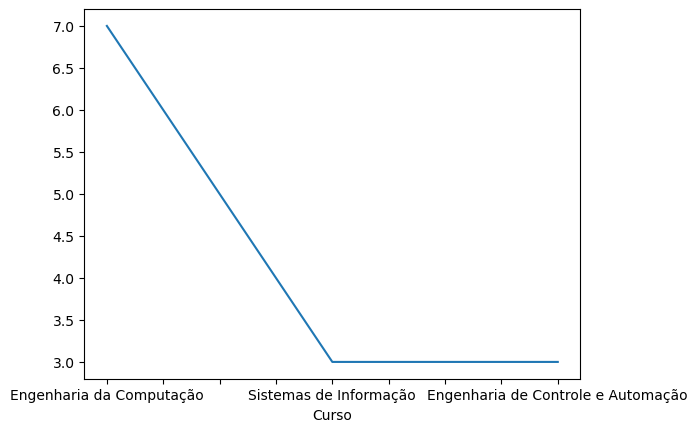

In [27]:
notas_graducao['Curso'].value_counts().plot()

[Text(0.5, 0, 'Curso'), Text(0, 0.5, 'Qtd Alunos')]

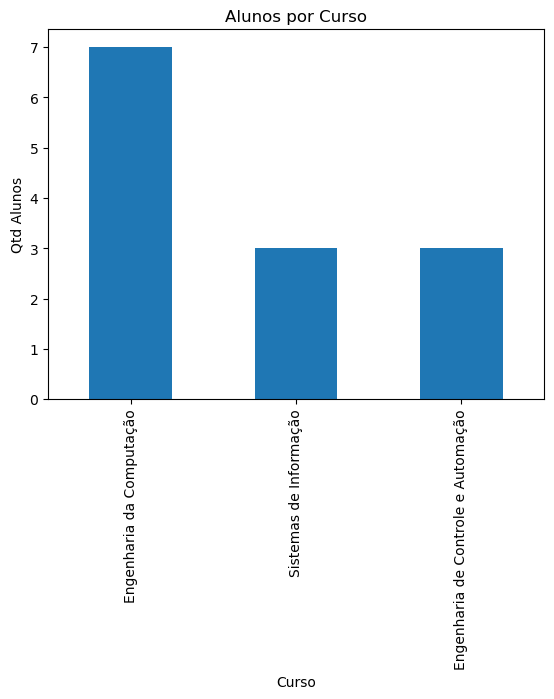

In [28]:
notas_graducao['Curso'].value_counts().plot(kind = 'bar', title = 'Alunos por Curso').set(xlabel = 'Curso', ylabel = 'Qtd Alunos')

In [29]:
temp = pd.read_csv('Temperatura.csv', sep = ';')
temp.head(3)

,cidade,estado,data_coleta,temperatura
0,Belo Horizonte,MG,11/01/2020,31
1,Belo Horizonte,MG,12/01/2020,30
2,Belo Horizonte,MG,13/01/2020,32


[Text(0.5, 0, 'Cidades'), Text(0, 0.5, 'Temperatura')]

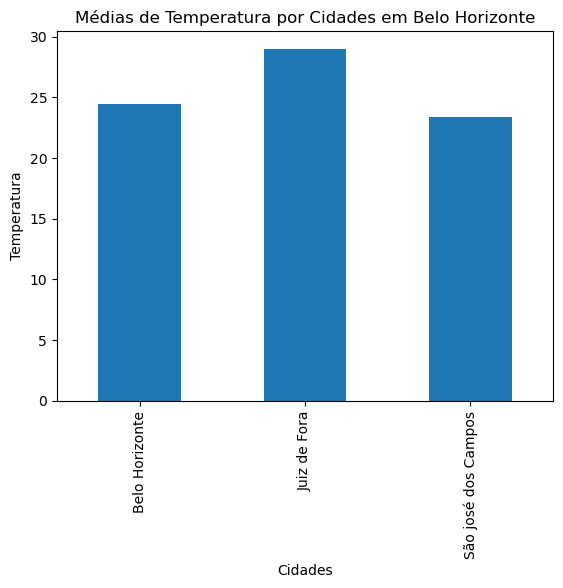

In [30]:
temp.groupby(['cidade'])['temperatura'].mean().plot(
    kind= 'bar', 
    title ="Médias de Temperatura por Cidades em Belo Horizonte").set(
        xlabel = 'Cidades', 
        ylabel = 'Temperatura'
        )

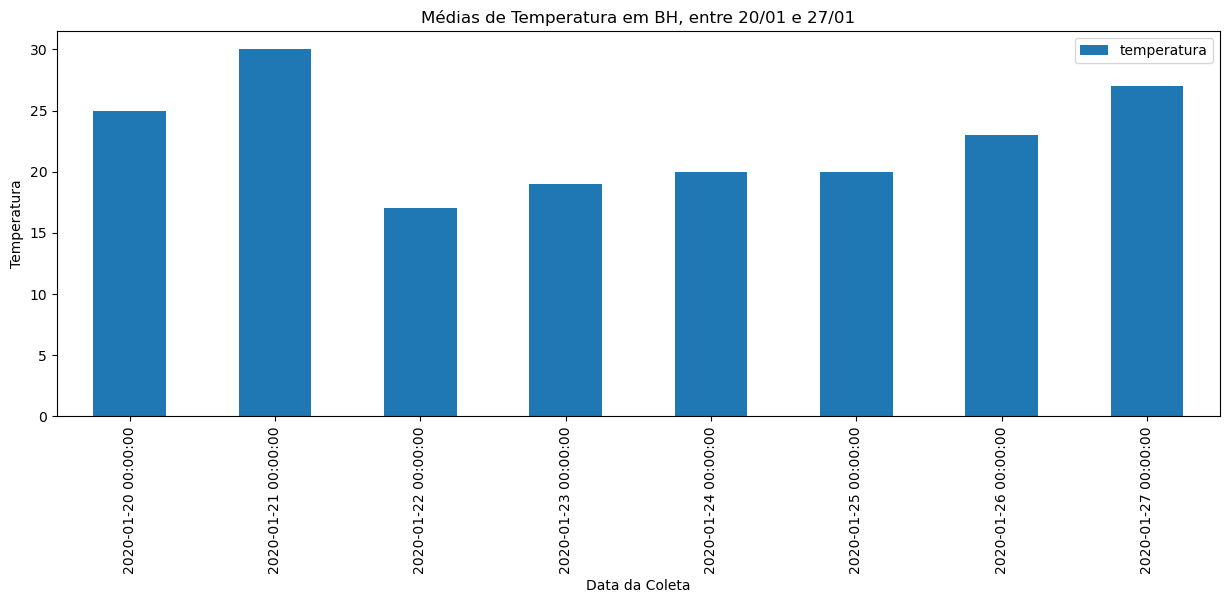

In [56]:
# Filtrando por período
temp['data_coleta'] = pd.to_datetime(temp['data_coleta'], format = '%d/%m/%Y')
temp__cidade_periodo = temp.query('data_coleta >= "20/01/2020" and data_coleta <= "27/01/2020" and cidade == "Belo Horizonte"')
temp__cidade_periodo.plot(
    kind= 'bar', 
    x='data_coleta',
    y='temperatura',
    title ="Médias de Temperatura em BH, entre 20/01 e 27/01",
    figsize=(15, 5),
    ).set(
        xlabel = 'Data da Coleta', 
        ylabel = 'Temperatura'
        );


---
---
# Aula 02 - Acessando o SQLite com o Pandas

    SQLite é uma biblioteca desenvolvida na linguagem C que implementa um banco de dados.  
    Software livre e de domínio público, simples e leve.  
    Permite guardar um banco de dados em um único arquivo.

Através da biblioteca sqlLite3, é possível realizar uma conexão com um banco de dados SQLite.

## ▹ **Acessando o SQLite**

Objeto para conexão do **SQLite**:
- `conexao = sqlite3.connect(':memory')` == Banco de dados trabalhado em RAM, caso não queria gastar armazenamento do PC.
- `conexao = sqlite3.connect(':memory')` == Banco de dados armazenado em arquivo em diretorio com final `.db`

Objetos de manipulação do SQLite:  
- `cursor`: objeto que permite manipular e navegar pelas registros do banco de dados.
  - `cursor.execute`: executa comandos ***sql*** no banco de dados.
  
- `conexao.commit`: aplica as alterações no banco de dados.
- `conexao.rollback`: descarta as alterações no banco de dados.
- `conexao.close`: fecha a conexão

### **Criando a Conexão e o Banco de Dados**

In [32]:
import sqlite3
conexao = sqlite3.connect('alunos.db') # Cria o banco de dados alunos.db, caso não exista

In [33]:
cursor = conexao.cursor() # Cria um cursor para executar comandos SQL no banco de dados

sql = """create table aluno(
    idAluno integer primary key autoincrement,
    nome varchar(100) not null,
    sexo char(1))"""

cursor.execute(sql) # Cria a tabela 'aluno' com os campos idAluno, nome e sexo no banco de dados

### **Manipulando os Dados com SQL**

In [34]:
import numpy as np

sql = """insert into aluno (nome, sexo) values (?, ?)"""

cursor.execute(sql, ['Alexandre', 'M']) # Insere apenas um registro em 'aluno'

alunos = [
    ['Silvia', 'F'],
    ['Carlos', 'M'],
    ['Maria', 'F'],
    ['João', np.NaN]
]

# Iterando a lista de alunos para inserir diversos registros no banco de dados
for aluno in alunos:
    cursor.execute(sql, aluno)
conexao.commit() # Salva as alterações no banco de dados

In [35]:
sql = """
select * 
from aluno
"""
cursor.execute(sql)
alunos = cursor.fetchall() # Busca todos os registros da tabela 'aluno'
 
for aluno in alunos:
    print(aluno)

(1, 'Alexandre', 'M')
(2, 'Silvia', 'F')
(3, 'Carlos', 'M')
(4, 'Maria', 'F')
(5, 'João', None)


In [36]:
sql = """
select *
from aluno
where idAluno >= ? and sexo = ?
"""

cursor.execute(sql, [2, 'F'])
alunos = cursor.fetchall()

for id, nome, sexo in alunos:
    print(f'ID: {id}, Nome: {nome}, Sexo: {sexo}')

ID: 2, Nome: Silvia, Sexo: F
ID: 4, Nome: Maria, Sexo: F


## ▹ **Usando o Pandas com o SQLite**

In [37]:
# Criando um DataFrame a partir da consulta SQL
sql = """
select * 
from aluno
"""
df_alunos = pd.read_sql_query(sql, conexao)
df_alunos.sample(3)

,idAluno,nome,sexo
2,3,Carlos,M
1,2,Silvia,F
4,5,João,None


<Axes: xlabel='sexo'>

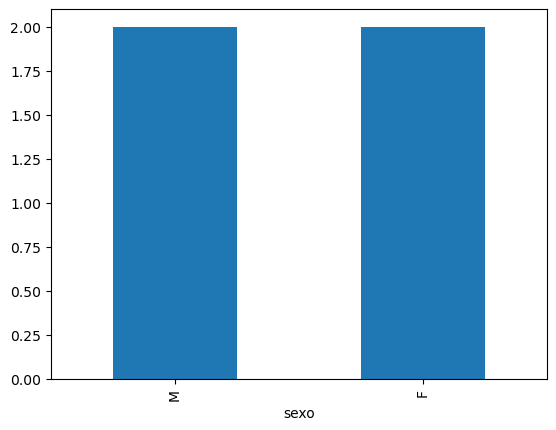

In [38]:
df_alunos['sexo'].value_counts().plot(kind = 'bar')

In [30]:
# Baixando o arquivo CSV de histórico de temperatura de Londres
import pandas as pd
df_london_temp = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')
df_london_temp.head(3)

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7


In [40]:
# Criando um banco de dados london_temp para usar com o SQLite
london_con = sqlite3.connect('london_temp.db')

# Subindo para o banco de dados as informações do DataFrame
df_london_temp.to_sql('london_temp', london_con, if_exists='replace')

748

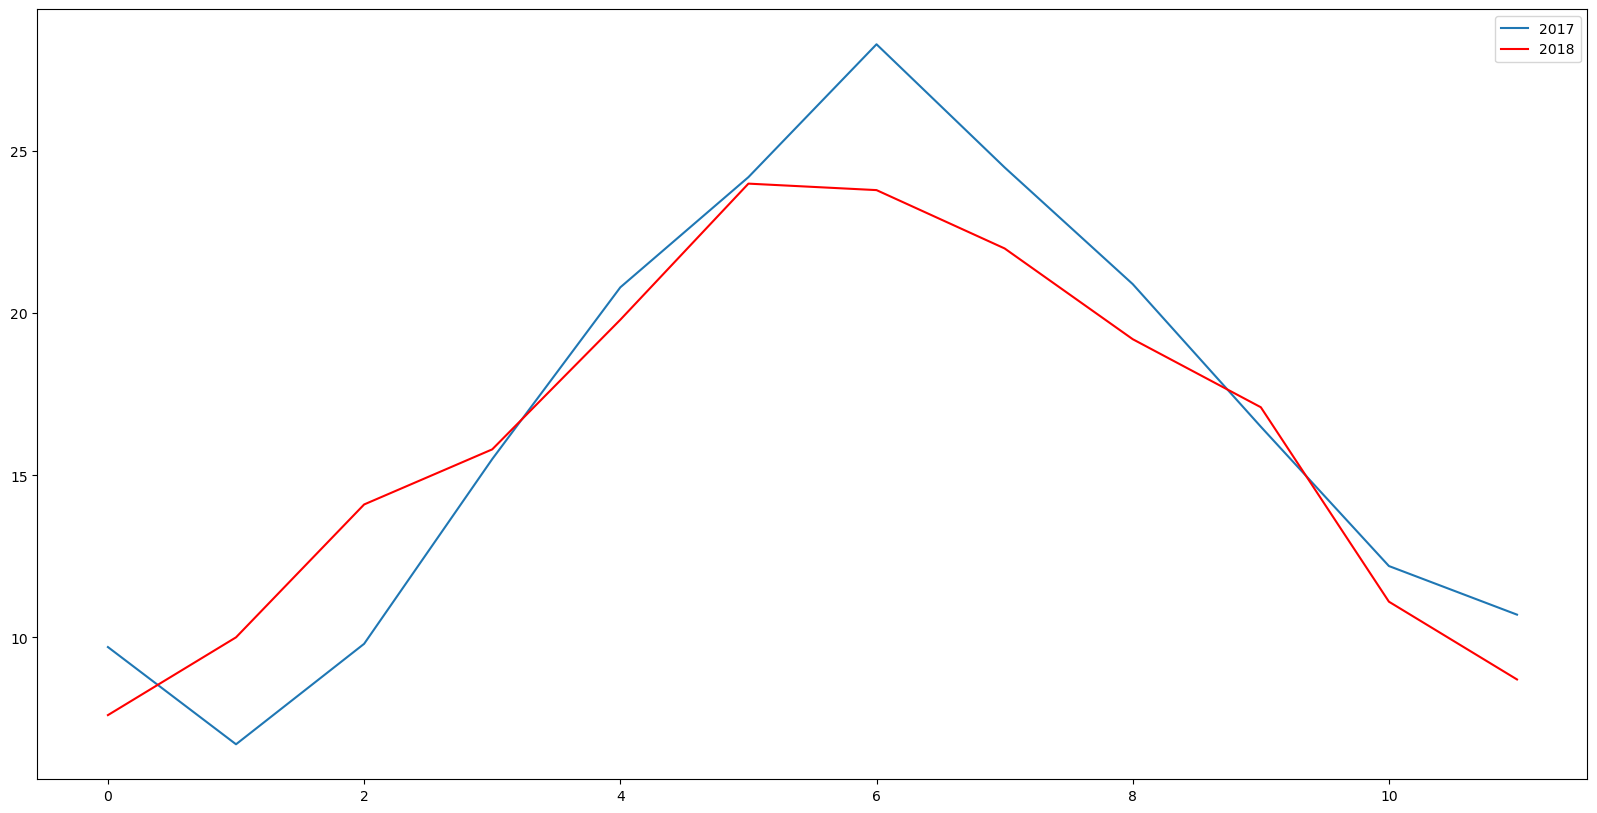

In [55]:
# Criando um DataFrame para cada ano da base de dados
y2017 = pd.read_sql_query('SELECT * from london_temp WHERE Year = 2017', london_con)
y2018 = pd.read_sql_query('SELECT * from london_temp WHERE Year = 2018', london_con)
y2019 = pd.read_sql_query('SELECT * from london_temp WHERE Year = 2019', london_con)

ax2018 = y2018.plot(y = 'Tmax')
ax = y2017.plot(y = 'Tmax', ax = ax2018, color = 'red', figsize= (20, 10))
ax.legend(['2017', '2018']);

In [49]:
sql = """
SELECT year, tmax as 'Tº Máxima'
FROM london_temp
WHERE month = 1
"""
mesJaneiro = pd.read_sql(sql, london_con)
mesJaneiro.sample(3)

,Year,Tº Máxima
15,1972,6.9
45,2002,9.5
36,1993,10.3


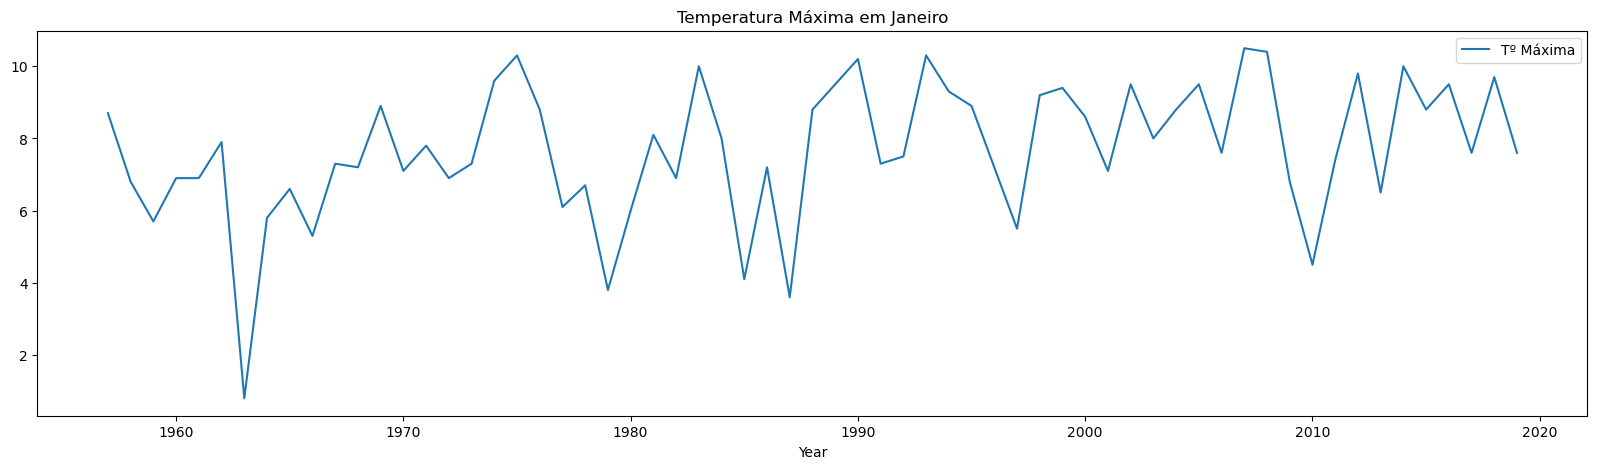

In [53]:
mesJaneiro.plot(y = 'Tº Máxima', x = 'Year', title = 'Temperatura Máxima em Janeiro', figsize=(20, 5));

In [60]:
mesMaior = pd.read_sql('SELECT Month, tmax as "Tº Máxima" FROM london_temp WHERE "Tº Máxima" > 24', london_con)
mesMaior['Month'].value_counts()

Month
7    19
8    14
6     2
Name: count, dtype: int64

---
---
  
# Aula 03 - Trabalhando com matplotlib

        Uma das principais bibliotecas de visualização do Python

In [1]:
import matplotlib.pyplot as plt

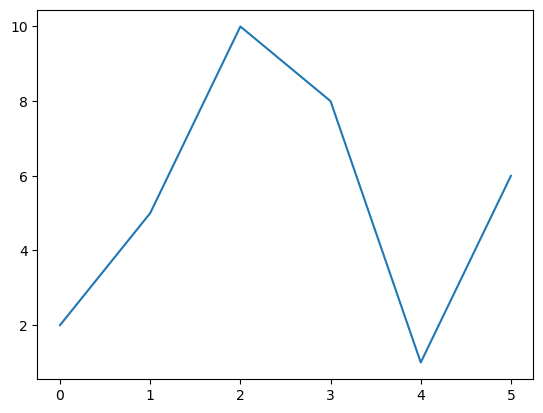

In [6]:
# Exemplo de criação de gráfico simples
lista_simples = [2,5,10,8,1,6]
plt.plot(lista_simples);

É possível configurar diferentes formas de visualizações dos gráficos, conforme a tabela de orientação abaixo.

📌
![String de formatação de gráficos](https://raw.githubusercontent.com/vbs-matheus/PosGraduacao-EngDados/refs/heads/main/imgs/string_formatacao_matplotlib.jpg)

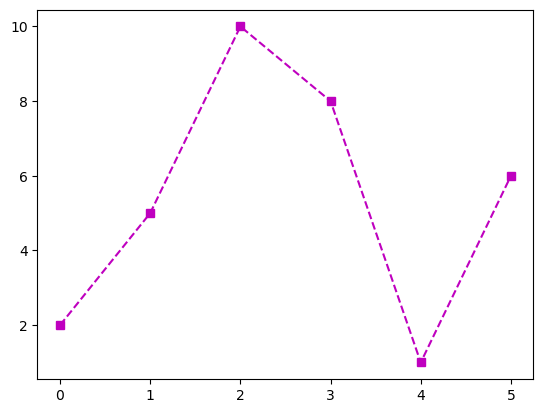

In [9]:
# Exemplo de gráfico formatado:

plt.plot(lista_simples, 'm--s') #formatação: cor magenta, linha tracejada, marcador quadrado


Podemos criar gráficos mais complexos, com sobreposição de conjuntos de Dados.

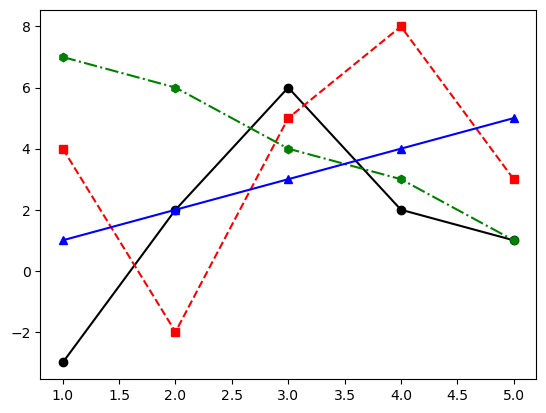

In [28]:
x = [1, 2, 3, 4, 5]
y1 = [-3, 2, 6, 2, 1]
y2 = [4, -2, 5, 8, 3]
y3 = [7, 6, 4, 3, 1]
y4 = [1, 2, 3, 4, 5]

plt.plot(x, y1, 'o-k', x, y2, 'r--s', x, y3, 'gh-.', x, y4, 'b-^');

### ▹ Criando um exemplo de uso com o arquivo de histórico de temperatura de Londres.


In [35]:
df_london_temp.to_csv('london_temp.csv', index = False) # Salvando no diretório para facilitar a manutenção, caso o link fique indisponível

# Primeiro vou usar um dos anos, apenas para pegar a contagem de meses para ser o eixo x
x = df_london_temp[df_london_temp['Year'] == 2017].Month

# Agora vou criar os dados para o eixo y, a partir dos históricos de temperatura de diversos anos
y_2017 = df_london_temp[df_london_temp['Year'] == 2017].Tmax
y_1997 = df_london_temp[df_london_temp['Year'] == 1997].Tmax
y_1977 = df_london_temp[df_london_temp['Year'] == 1977].Tmax
y_1957 = df_london_temp[df_london_temp['Year'] == 1957].Tmax


Text(6, 13, '(Tºmax = 16.2 \n em Maio de 1957)')

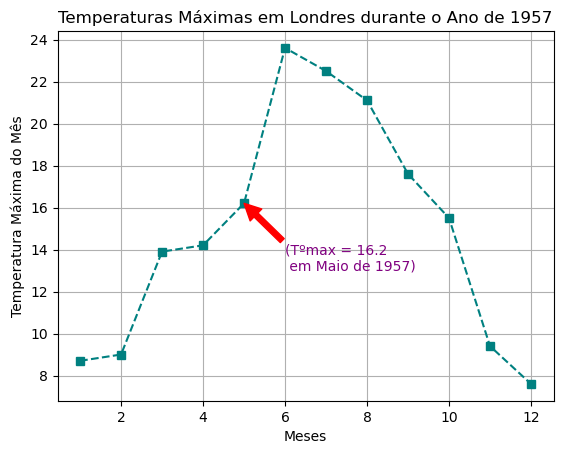

In [42]:
# Exemplo de Configuração de Gráfico
plt.plot(x, y_1957, color = 'teal', linestyle = 'dashed', marker = 's', markersize = 6)

# Configuração de títulos
plt.title('Temperaturas Máximas em Londres durante o Ano de 1957')
plt.xlabel('Meses')
plt.ylabel('Temperatura Máxima do Mês')

# Acrescentando grids
plt.grid();

# Acrescentando anotação
plt.annotate('(Tºmax = 16.2 \n em Maio de 1957)', color = 'purple', xy = (5, 16.2), xytext=(6, 13), arrowprops=dict(color = 'red'))

### ▹ Explorando Estilos de Gráficos

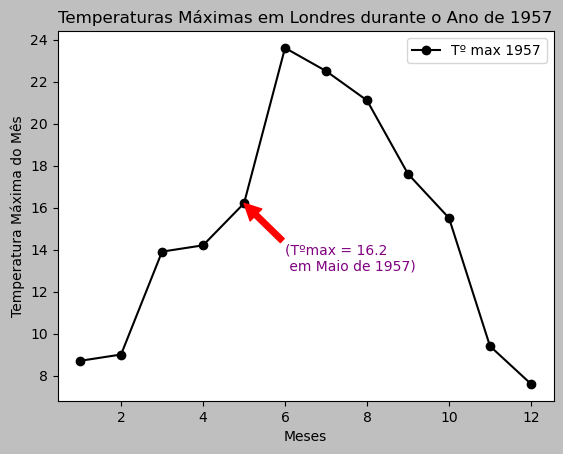

In [52]:
plt.rcdefaults() # Reseta as configurações do gráfico

plt.style.use('grayscale') # Muda o estilo do gráfico

# Usando as configurações do gráfico anterior
plt.plot(x, y_1957, marker = 'o', label = "Tº max 1957")
plt.title('Temperaturas Máximas em Londres durante o Ano de 1957')
plt.xlabel('Meses')
plt.ylabel('Temperatura Máxima do Mês')

# Acrescentando anotação
plt.annotate('(Tºmax = 16.2 \n em Maio de 1957)', color = 'purple', xy = (5, 16.2), xytext=(6, 13), arrowprops=dict(color = 'red'))

# Ativar a legenda
plt.legend();

Transformando em um Gráfico de Barras

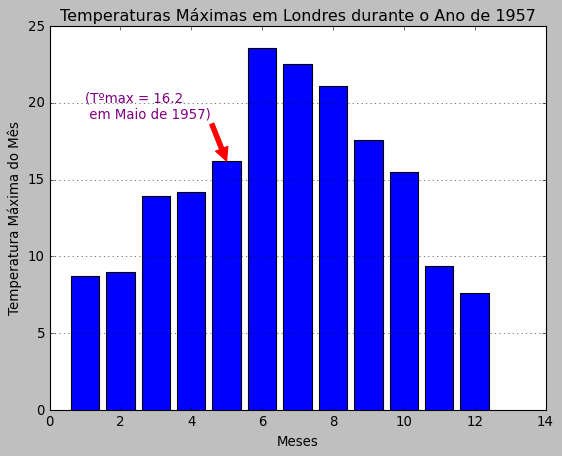

In [57]:
plt.rcdefaults()
plt.style.use('classic')

plt.bar(x, y_1957, label = 'Tº max 1957') # Utiliza o grafíco para o tipo barra

plt.annotate('(Tºmax = 16.2 \n em Maio de 1957)', color = 'purple', xy = (5, 16.2), xytext=(1, 19), arrowprops=dict(color = 'red'))
plt.title('Temperaturas Máximas em Londres durante o Ano de 1957')
plt.xlabel('Meses')
plt.ylabel('Temperatura Máxima do Mês')
plt.grid(axis='y')

### Gráficos Sobrepostos

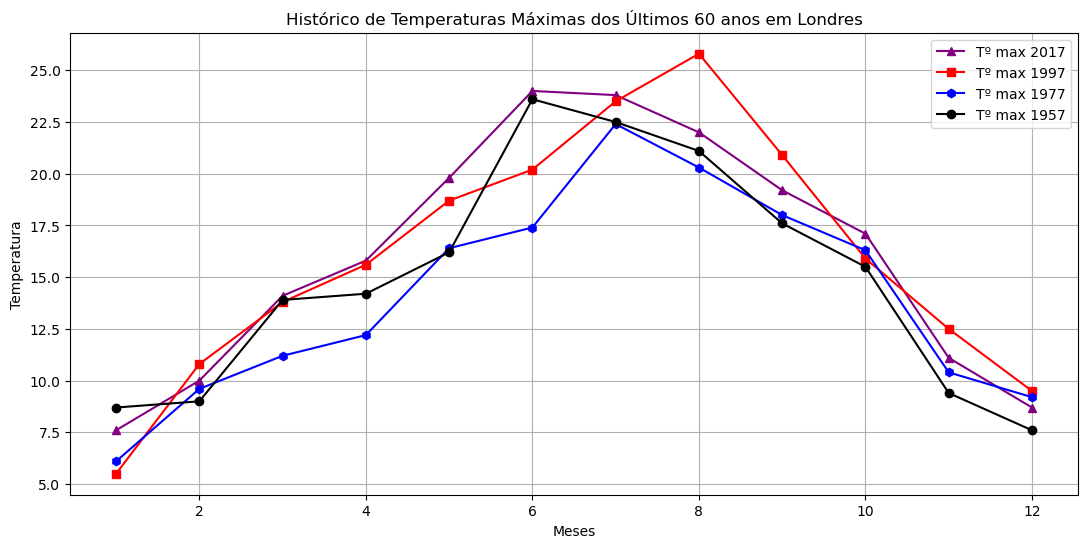

In [88]:
plt.rcdefaults()

plt.figure(figsize=(13, 6)) # Melhorando a visualização, aumentando a figura

plt.plot(x, y_2017, marker = '^', label = "Tº max 2017", color = 'purple');
plt.plot(x, y_1997, marker = 's', label = "Tº max 1997", color = 'red')
plt.plot(x, y_1977, marker = 'h', label = "Tº max 1977", color = 'blue')
plt.plot(x, y_1957, marker = 'o', label = "Tº max 1957", color = 'black')

plt.title('Histórico de Temperaturas Máximas dos Últimos 60 anos em Londres')
plt.xlabel('Meses')
plt.ylabel("Temperatura")

plt.grid()

plt.legend();

### Subplot

Diferente do gráfico sobreposto, o subplot produz diversos gráficos dentro de uma única área de plotagem.
  
Com a subplotagrem, imagina-se a área de plotagem como um grid de uma planilha. Então configuramos a área distribuindo equivalências direcionais de linhas e colunas, como coordenadas.

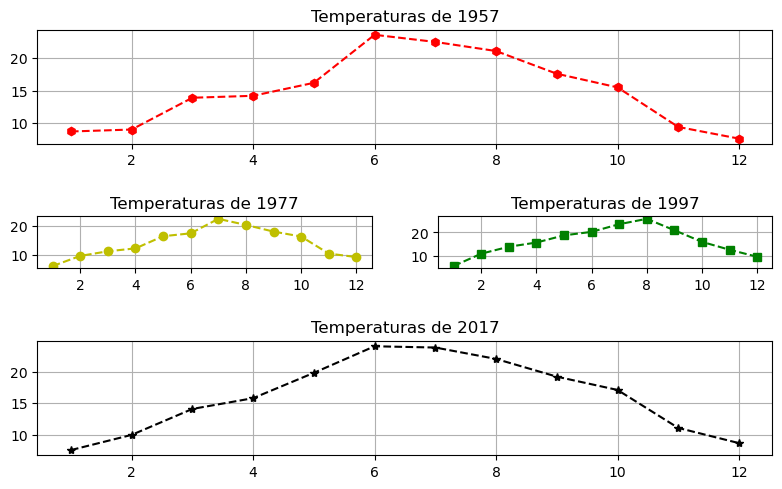

In [94]:
# Tamanho da área de plotagem
gridsize = (15, 5)
fig = plt.figure(figsize=(25,12))

# Distribuindo as coordenadas e uso do grid
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=2, rowspan=2) # 1º gráfico. Usará 2 linhas e 2 colunas
ax2 = plt.subplot2grid(gridsize, (3,0)) # 2º gráfico. Usará apenas 1 célula
ax3 = plt.subplot2grid(gridsize, (3,1)) # 3º gráfico. Usará apenas 1 célula
ax4 = plt.subplot2grid(gridsize, (5,0), colspan=2, rowspan=2) # 4º gráfico. Usará 2 linhas e 2 colunas

# Configurando o ax1
ax1.set_title('Temperaturas de 1957')
ax1.plot(x, y_1957, 'rh--')
ax1.grid()

# Configurando o ax2
ax2.set_title('Temperaturas de 1977')
ax2.plot(x, y_1977, 'yo--')
ax2.grid()

# Configurando o ax3
ax3.set_title('Temperaturas de 1997')
ax3.plot(x, y_1997, 'gs--')
ax3.grid()

# Configurando o ax4
ax4.set_title('Temperaturas de 2017')
ax4.plot(x, y_2017, 'k*--')
ax4.grid()

📌Representação da distribuição dos subplots na grid.  
![Subplot Grid](https://raw.githubusercontent.com/vbs-matheus/PosGraduacao-EngDados/refs/heads/main/imgs/coordenadas_subplot.png)